## First we explore the spray.csv

In [1]:
# import libraries

# maths
import numpy as np
import pandas as pd
import scipy.stats as stats
from pandas.api.types import is_numeric_dtype

# visual
#from matplotlib_venn import venn2
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [2]:
import pandas as pd
import numpy as np
spray = pd.read_csv('../assets/spray.csv')

In [3]:
spray.head()

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858


In [4]:
def explore(df):
    print(df.shape)
    print("")
    print(df.head())
    print("")
    print(df.dtypes)
    print("")
    print(df.isnull().sum())
    print("")
    print(df.describe())
    
explore(spray)

(14835, 4)

         Date        Time   Latitude  Longitude
0  2011-08-29  6:56:58 PM  42.391623 -88.089163
1  2011-08-29  6:57:08 PM  42.391348 -88.089163
2  2011-08-29  6:57:18 PM  42.391022 -88.089157
3  2011-08-29  6:57:28 PM  42.390637 -88.089158
4  2011-08-29  6:57:38 PM  42.390410 -88.088858

Date          object
Time          object
Latitude     float64
Longitude    float64
dtype: object

Date           0
Time         584
Latitude       0
Longitude      0
dtype: int64

           Latitude     Longitude
count  14835.000000  14835.000000
mean      41.904828    -87.736690
std        0.104381      0.067292
min       41.713925    -88.096468
25%       41.785001    -87.794225
50%       41.940075    -87.727853
75%       41.980978    -87.694108
max       42.395983    -87.586727


In [5]:
#checking the list of date that spraying occured
spray['Date'] = pd.to_datetime(spray['Date'])
spray['Time'] = pd.to_timedelta(spray['Time'])
spray.groupby(['Date']).count()

,Time,Latitude,Longitude
Date,,,
2011-08-29,95,95,95
2011-09-07,1530,2114,2114
2013-07-17,2202,2202,2202
2013-07-25,1607,1607,1607
2013-08-08,1195,1195,1195
2013-08-15,2668,2668,2668
2013-08-16,141,141,141
2013-08-22,1587,1587,1587
2013-08-29,2302,2302,2302


In [6]:
#checking which are the dates that time is null
nans = lambda spray: spray[spray.isnull().any(axis=1)]
nans(spray)

,Date,Time,Latitude,Longitude
1030,2011-09-07,NaT,41.987092,-87.794286
1031,2011-09-07,NaT,41.987620,-87.794382
1032,2011-09-07,NaT,41.988004,-87.794574
1033,2011-09-07,NaT,41.988292,-87.795486
1034,2011-09-07,NaT,41.988100,-87.796014
1035,2011-09-07,NaT,41.986372,-87.794862
1036,2011-09-07,NaT,41.986228,-87.795582
1037,2011-09-07,NaT,41.984836,-87.793998
1038,2011-09-07,NaT,41.984836,-87.794670
1039,2011-09-07,NaT,41.984884,-87.795198


## Spray conclusion:
    spray.shape = (14835, 4)
    584 null values in Time column only, all null values are in 2011-09-07
    However, not all 2011-09-07 time are null values (584/1530 are nulls)
    
    changed Date and Time to datetime and timedelta respectively
    
    2 sprays in 2011, once in Aug, once in Sept 
    8 sprays in 2013, twice in July, 5 times in Aug, once in Sept
    
sidenote: might be linked to weather conditions <br>
(ie hotter in 2013 than 2011, or increased mosquitoes activites hence an increase in sprays)

In [7]:
spray_2 = spray

In [8]:
spray_2.to_csv("../assets/spray_2.csv", index=False) 


## Now, we move on to explore "weather.csv"

In [9]:
weather = pd.read_csv('../assets/weather.csv')

In [10]:
weather.head()

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,...,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,...,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,...,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,...,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9


In [11]:
explore(weather)

(2944, 22)

   Station        Date  Tmax  Tmin Tavg Depart  DewPoint WetBulb Heat Cool  \
0        1  2007-05-01    83    50   67     14        51      56    0    2   
1        2  2007-05-01    84    52   68      M        51      57    0    3   
2        1  2007-05-02    59    42   51     -3        42      47   14    0   
3        2  2007-05-02    60    43   52      M        42      47   13    0   
4        1  2007-05-03    66    46   56      2        40      48    9    0   

   ... CodeSum Depth Water1 SnowFall PrecipTotal StnPressure SeaLevel  \
0  ...             0      M      0.0        0.00       29.10    29.82   
1  ...             M      M        M        0.00       29.18    29.82   
2  ...      BR     0      M      0.0        0.00       29.38    30.09   
3  ...   BR HZ     M      M        M        0.00       29.44    30.08   
4  ...             0      M      0.0        0.00       29.39    30.12   

  ResultSpeed ResultDir  AvgSpeed  
0         1.7        27       9.2  
1       

In [12]:
#expand the Date column to Year,Month,Day to check on the period of data and see if there are any missing days/months
from pandas import Timestamp

weather['Date'] = pd.to_datetime(weather['Date'])
weather['Year'] = weather['Date'].dt.year
weather['Month'] = weather['Date'].dt.month
weather['Day'] = weather['Date'].dt.day

# Show three rows
weather.head(3)

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Year,Month,Day
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,0.0,0.00,29.10,29.82,1.7,27,9.2,2007,5,1
1,2,2007-05-01,84,52,68,M,51,57,0,3,...,M,0.00,29.18,29.82,2.7,25,9.6,2007,5,1
2,1,2007-05-02,59,42,51,-3,42,47,14,0,...,0.0,0.00,29.38,30.09,13.0,4,13.4,2007,5,2


In [13]:
#Creating dummy variables for the weather CodeSum data
weather['CodeSum'] = weather['CodeSum'].apply(str.split)
for i, list_ in enumerate(weather['CodeSum']):
    for item in list_:
        if item not in weather.columns:
            weather[item] = 0
            weather.set_value(col=item,index=i,value=1)
        else:
            weather.set_value(col=item,index=i,value=1)


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  import sys
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':


In [14]:
#replacing codes with other values
weather = weather.replace('M',0)
weather = weather.replace('-',np.nan)
weather = weather.replace(' ',np.nan)
weather = weather.replace('T',0.0005)

In [15]:
#dropping these columns since they are used for winter purposes,
#hence their values are zero and empty for the other weather station
weather = weather.drop(['Depth','Water1','SnowFall'],axis=1)

In [16]:
#To fill missing Tavg data with Average Temp.
for i in range(weather.shape[0]):
    if weather.loc[i,'Tavg'] == 0:
        weather.loc[i,'Tavg'] = int(np.round((weather.loc[i,'Tmax'] + weather.loc[i,'Tmin'])/2))
    else:
        weather.loc[i,'Tavg'] = weather.loc[i,'Tavg']

In [17]:
columns = ['Tavg',
           'Depart']

for i in columns:
    weather[i] = weather[i].astype(str).astype(float)

### Wet Bulb definition and approach
#source: [https://www.theweatherprediction.com/habyhints/170/] <br>
A quick technique that many forecasters use to determine the wet-bulb temperature <br>
is called the "1/3 rule". The technique is to first find the dewpoint depression (temperature minus dewpoint). <br>
Then take this number and divide by 3. Subtract this number from the temperature.<br>

Since there are only 4 missing wetbulb cells, we will use this estimate<br>
wet bulb might be linked to humidity, we might be able to create a feature engineer a new column<br>

In [18]:
#To estimate the value for 'WetBulb'
for i in range(weather.shape[0]):
    if weather.loc[i,'WetBulb'] == 0:
        weather.loc[i,'WetBulb'] = np.round(weather.loc[i,'Tavg'] - (weather.loc[i,'Tavg'] - weather.loc[i,'Depart'])/3)
                                                                    
    else:
        weather.loc[i,'WetBulb'] = weather.loc[i,'WetBulb']

### Heat/Cool definition and approach
#Heat
A heating degree day (HDD) is a measurement designed to quantify the demand for energy 
needed to heat a building. It is the number of degrees that a day's average temperature 
is below 65o Fahrenheit (18o Celsius), which is the temperature below which buildings 
need to be heated. 

#Cool
A cooling degree day (CDD) is a measurement designed to quantify the demand for energy 
needed to cool buildings. It is the number of degrees that a day's average temperature 
is above 65o Fahrenheit (18o Celsius).

In [19]:
#To estimate the value for 'Heat' and 'Cool'
for i in range(weather.shape[0]):
    if weather.loc[i,'Heat'] == 0:
        if 65 - weather.loc[i,'Tavg'] > 0:
            weather.loc[i,'Heat'] = 65 - weather.loc[i,'Tavg']
        else:
            weather.loc[i,'Heat'] = 0 
    else:
        weather.loc[i,'Heat'] = weather.loc[i,'Heat']

        

for i in range(weather.shape[0]):
    if weather.loc[i,'Cool'] == 0:
        if  weather.loc[i,'Tavg'] - 65 > 0:
            weather.loc[i,'Cool'] = weather.loc[i,'Tavg'] - 65
        else:
            weather.loc[i,'Cool'] = 0 
    else:
        weather.loc[i,'Cool'] = weather.loc[i,'Cool']

In [20]:
#changing traces of precipation total to 0.005 so that we can use the values to analyse the model
weather['PrecipTotal'] = weather['PrecipTotal'].replace(np.nan,'0.00')
weather['PrecipTotal'] = weather['PrecipTotal'].replace('  T','0.005')

In [21]:
#change station pressure np.nan to mean
weather['StnPressure'] = weather['StnPressure'].replace(np.nan,0)
weather['StnPressure'] = weather['StnPressure'].astype(str).astype(float)
weather['StnPressure'] = weather['StnPressure'].replace(0,weather['StnPressure'].mean())

In [22]:
#change sealevel np.nan to mean
weather['SeaLevel'] = weather['SeaLevel'].replace(np.nan,0)
weather['SeaLevel'] = weather['SeaLevel'].astype(str).astype(float)
weather['SeaLevel'] = weather['SeaLevel'].replace(0,weather['StnPressure'].mean())

In [23]:
columns = ['WetBulb',
           'Heat',
           'Cool',
           'PrecipTotal',
           'AvgSpeed',
           'Sunrise',
           'Sunset']

for i in columns:
    weather[i] = weather[i].astype(str).astype(float)

In [24]:
explore(weather)

(2944, 38)

   Station       Date  Tmax  Tmin  Tavg  Depart  DewPoint  WetBulb  Heat  \
0        1 2007-05-01    83    50  67.0    14.0        51     56.0   0.0   
1        2 2007-05-01    84    52  68.0     0.0        51     57.0   0.0   
2        1 2007-05-02    59    42  51.0    -3.0        42     47.0  14.0   
3        2 2007-05-02    60    43  52.0     0.0        42     47.0  13.0   
4        1 2007-05-03    66    46  56.0     2.0        40     48.0   9.0   

   Cool  ...  TS  DZ BCFG  FG+  MIFG  FG  SQ  SN  VCFG  GR  
0   2.0  ...   0   0    0    0     0   0   0   0     0   0  
1   3.0  ...   0   0    0    0     0   0   0   0     0   0  
2   0.0  ...   0   0    0    0     0   0   0   0     0   0  
3   0.0  ...   0   0    0    0     0   0   0   0     0   0  
4   0.0  ...   0   0    0    0     0   0   0   0     0   0  

[5 rows x 38 columns]

Station                 int64
Date           datetime64[ns]
Tmax                    int64
Tmin                    int64
Tavg                 

In [25]:
weather.shape

(2944, 38)

In [26]:
weather_2 = weather.groupby('Date').agg({'Year':'max',
                                         'Month':'max',
                                         'Day':'max',
                                         'Tmax':'mean', 
                                         'Tmin':'mean', 
                                         'Tavg':'mean', 
                                         'Depart': 'sum', 
                                         'DewPoint':'mean',
                                         'WetBulb':'mean',
                                         'Heat':'mean',
                                         'Cool':'mean',
                                         'Sunrise':'mean',
                                         'Sunset':'mean',
                                         'PrecipTotal':'mean',
                                         'StnPressure':'mean',
                                         'SeaLevel':'mean',
                                         'ResultSpeed':'mean',
                                         'ResultDir':'mean',
                                         'AvgSpeed':'mean',
                                         'BR':'max',
                                         'HZ':'max',
                                         'RA':'max',
                                         'TSRA':'max', 
                                         'VCTS':'max', 
                                         'FU':'max',
                                         'TS':'max',
                                         'DZ':'max',
                                         'BCFG':'max',
                                         'FG+':'max',
                                         'MIFG':'max',
                                         'SQ':'max',
                                         'SN':'max',
                                         'VCFG':'max',
                                         'GR':'max'})

In [27]:
explore(weather_2)

(1472, 34)

            Year  Month  Day  Tmax  Tmin  Tavg  Depart  DewPoint  WetBulb  \
Date                                                                        
2007-05-01  2007      5    1  83.5  51.0  67.5    14.0      51.0     56.5   
2007-05-02  2007      5    2  59.5  42.5  51.5    -3.0      42.0     47.0   
2007-05-03  2007      5    3  66.5  47.0  57.0     2.0      40.0     49.0   
2007-05-04  2007      5    4  72.0  50.0  61.0     4.0      41.5     50.0   
2007-05-05  2007      5    5  66.0  53.5  60.0     5.0      38.5     49.5   

            Heat  ...  FU  TS  DZ  BCFG  FG+  MIFG  SQ  SN  VCFG  GR  
Date              ...                                                 
2007-05-01   0.0  ...   0   0   0     0    0     0   0   0     0   0  
2007-05-02  13.5  ...   0   0   0     0    0     0   0   0     0   0  
2007-05-03   8.0  ...   0   0   0     0    0     0   0   0     0   0  
2007-05-04   4.0  ...   0   0   0     0    0     0   0   0     0   0  
2007-05-05   5.0  ... 

In [28]:
columns = ['Sunrise',
           'Sunset']

for i in columns:
    weather_2[i] = weather_2[i].astype(float).astype(int)
    weather_2[i] = weather_2[i].astype(int).astype(str)

In [29]:
#changing Sunrise and Sunset to type - time
weather_2['Sunrise'] = str(0) + weather_2['Sunrise']
weather_2['Sunrise'] = weather_2['Sunrise'].str[0:2] + ":" + weather_2['Sunrise'].str[2:4] + ":00"

weather_2['Sunset'] = weather_2['Sunset'].str[0:2] + ":" + weather_2['Sunset'].str[2:4] + ":00"


weather_2['Sunrise'] = pd.to_timedelta(weather_2['Sunrise'])
weather_2['Sunset'] = pd.to_timedelta(weather_2['Sunset'])

In [30]:
weather_2 = weather_2.reset_index()

In [31]:
weather_2.to_csv("../assets/weather_2.csv", index=False) 

## Conclusion Weather:
weather.shape = (1472, 36) <br>

change the CodeSum to dummies

# Next, to explore train and test sets

Will merge both data sets, do data cleaning on both.
Then seperate them indivdually again

In [32]:
train = pd.read_csv('../assets/train.csv')
test = pd.read_csv('../assets/test.csv')

In [33]:
train.columns

Index(['Date', 'Address', 'Species', 'Block', 'Street', 'Trap',
       'AddressNumberAndStreet', 'Latitude', 'Longitude', 'AddressAccuracy',
       'NumMosquitos', 'WnvPresent'],
      dtype='object')

In [34]:
test.columns

Index(['Id', 'Date', 'Address', 'Species', 'Block', 'Street', 'Trap',
       'AddressNumberAndStreet', 'Latitude', 'Longitude', 'AddressAccuracy'],
      dtype='object')

In [35]:
print(train.shape)
print(test.shape)

(10506, 12)
(116293, 11)


In [36]:
test = test.drop(['Id'], axis=1)

In [37]:
train['Date'] = pd.to_datetime(train['Date'])
train['Year'] = (train['Date'].dt.strftime('%Y')).astype(int)
train['Month'] = (train['Date'].dt.month.astype(int))
train['Week'] = (train['Date'].dt.strftime('%W')).astype(int)
train['Day'] = (train['Date'].dt.day.astype(int))

In [38]:
train_year = list(train['Year'].unique())
train_year

[2007, 2009, 2011, 2013]

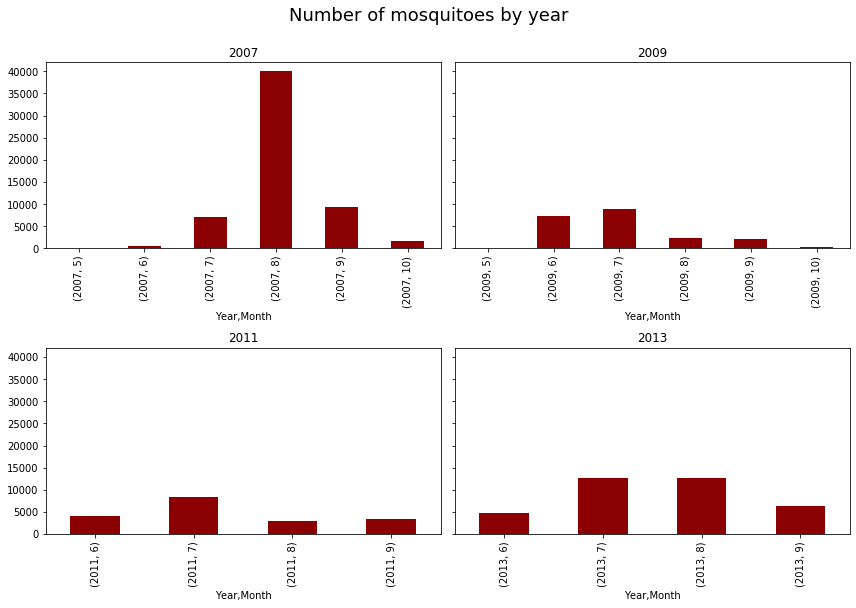

In [39]:
#no. of mosquitoes by year
#generally more cases in July and Aug- Higher temperatures in summer could lead to more mosquitoes
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,8),sharey=True)
ax = ax.ravel()
plt.suptitle('Number of mosquitoes by year', fontsize=18, y=1.05)
for i, y in enumerate(train_year):
    train[train['Year']==y].groupby(['Year', 'Month']).NumMosquitos.sum().plot(kind='bar', ax=ax[i],color='darkred')
    ax[i].set_title(y)
plt.tight_layout()

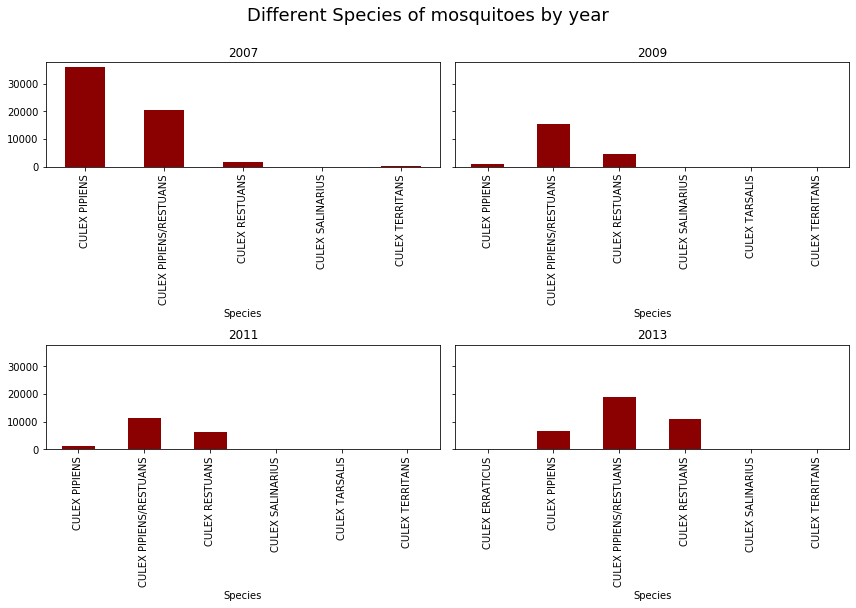

In [40]:
#different mosquitoes each year
#Higher populations of certain species 
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,8),sharey=True)
ax = ax.ravel()
plt.suptitle('Different Species of mosquitoes by year', fontsize=18, y=1.05)
for i, y in enumerate(train_year):
    train[train['Year']==y].groupby(['Species']).NumMosquitos.sum().plot(kind='bar', ax=ax[i],color='darkred')
    ax[i].set_title(y)
plt.tight_layout()

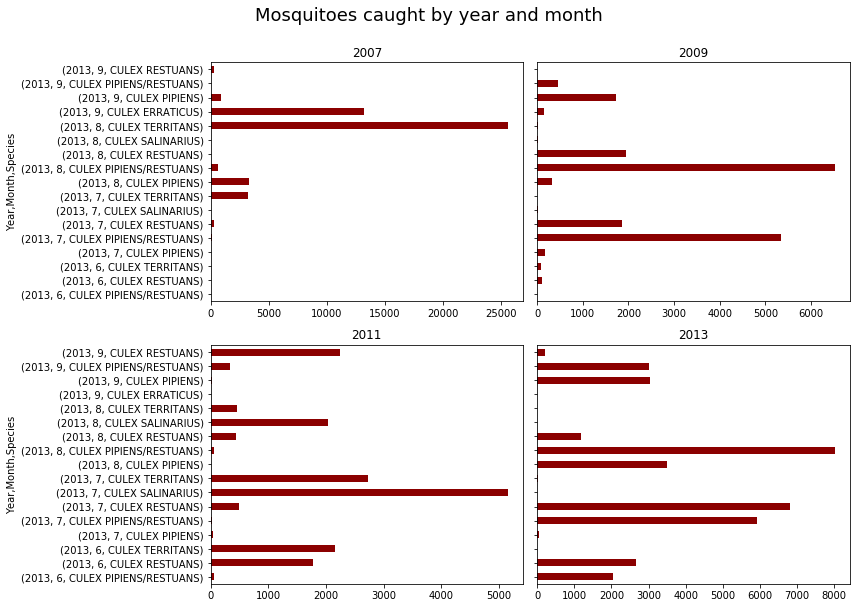

In [41]:
#number of mosquitoes by year and month
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,8),sharey=True)
ax = ax.ravel()
plt.suptitle('Mosquitoes caught by year and month', fontsize=18, y=1.05)
for i, y in enumerate(train_year):
    train[train['Year']==y].groupby(['Year','Month','Species']).NumMosquitos.sum().plot(kind='barh', ax=ax[i],color='darkred')
    ax[i].set_title(y)
plt.tight_layout()

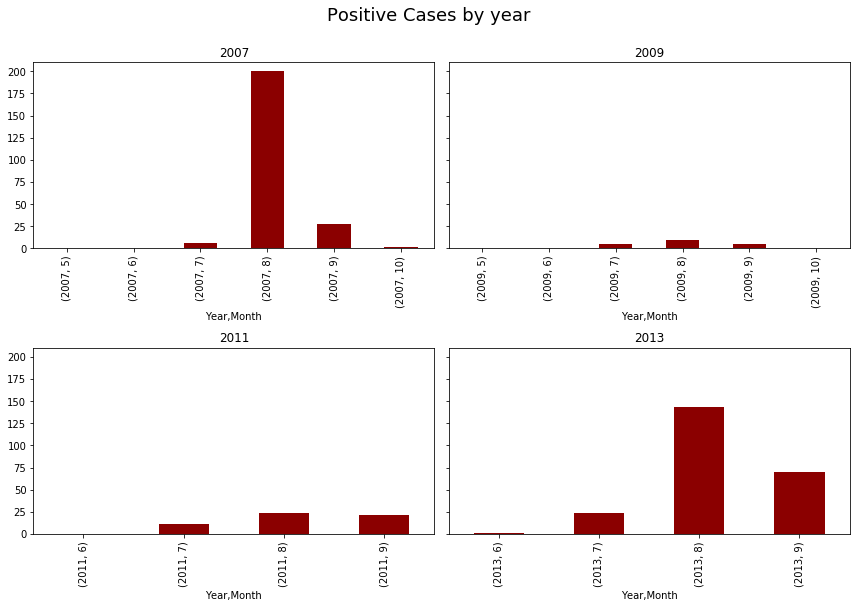

In [42]:
#positive WNV by year and month
#similarly, more positive cases during summer period
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,8),sharey=True)
ax = ax.ravel()
plt.suptitle('Positive Cases by year', fontsize=18, y=1.05)
for i, y in enumerate(train_year):
    train[train['Year']==y].groupby(['Year','Month']).WnvPresent.sum().plot(kind='bar', ax=ax[i],color='darkred')
    ax[i].set_title(y)
plt.tight_layout()

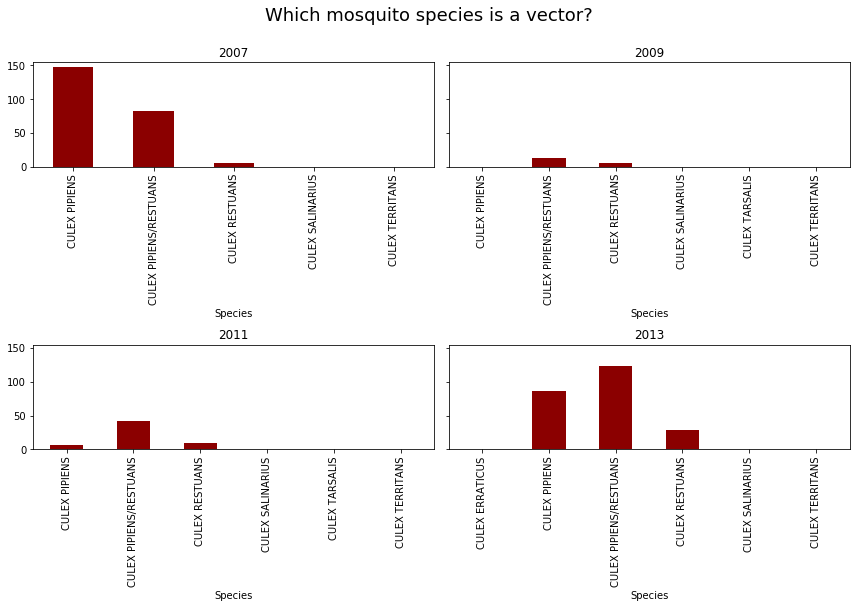

In [43]:
#positive WNV by by species
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,8),sharey=True)
ax = ax.ravel()
plt.suptitle('Which mosquito species is a vector?', fontsize=18, y=1.05)
for i, y in enumerate(train_year):
    train[train['Year']==y].groupby(['Species']).WnvPresent.sum().plot(kind='bar', ax=ax[i],color='darkred')
    ax[i].set_title(y)
plt.tight_layout()

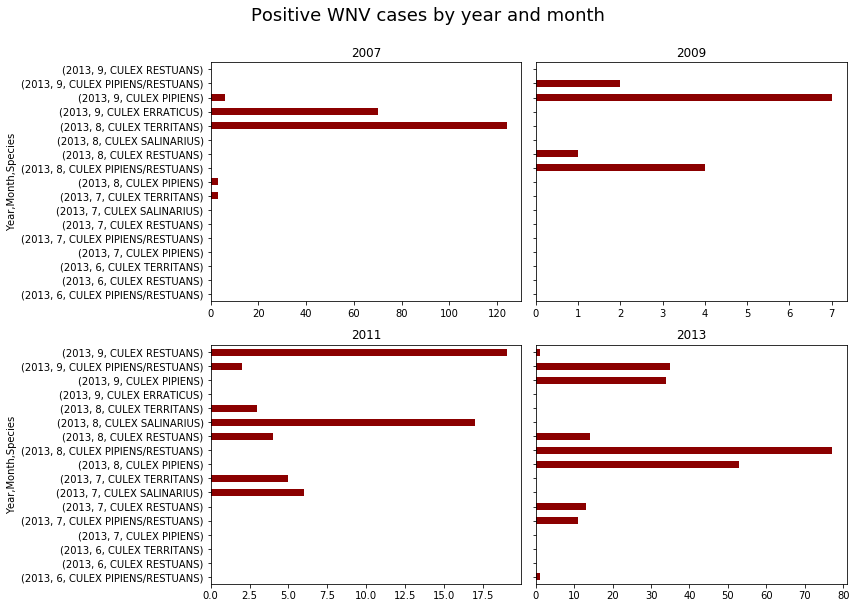

In [44]:
#Positive WNV cases by year and month
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,8),sharey=True)
ax = ax.ravel()
plt.suptitle('Positive WNV cases by year and month', fontsize=18, y=1.05)
for i, y in enumerate(train_year):
    train[train['Year']==y].groupby(['Year','Month','Species']).WnvPresent.sum().plot(kind='barh', ax=ax[i],color='darkred')
    ax[i].set_title(y)
plt.tight_layout()

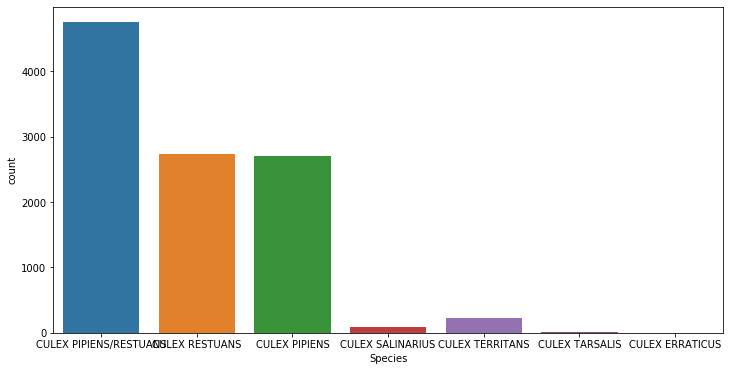

In [45]:
#countplot
plt.figure(figsize=(12,6))
sns.countplot(train.Species)

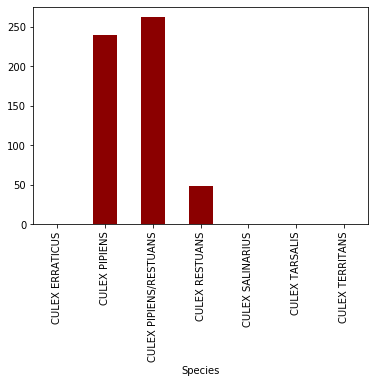

In [46]:
#only these 3 species are vectors
train.groupby('Species').WnvPresent.sum().plot(kind='bar',color='darkred')

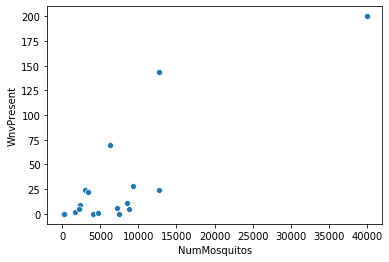

In [47]:
#more mosqutoes means more positive wnv
sns.scatterplot(x=train.groupby(['Year', 'Month']).NumMosquitos.sum(),
                y= train.groupby(['Year', 'Month']).WnvPresent.sum(),
               data=train)


In [48]:
test['Date'] = pd.to_datetime(test['Date'])

In [49]:
combined = pd.merge(train,test,how='outer')

In [50]:
explore(combined)

(126799, 16)

        Date                                            Address  \
0 2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
1 2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
2 2007-05-29  6200 North Mandell Avenue, Chicago, IL 60646, USA   
3 2007-05-29    7900 West Foster Avenue, Chicago, IL 60656, USA   
4 2007-05-29    7900 West Foster Avenue, Chicago, IL 60656, USA   

                  Species  Block           Street  Trap  \
0  CULEX PIPIENS/RESTUANS     41   N OAK PARK AVE  T002   
1          CULEX RESTUANS     41   N OAK PARK AVE  T002   
2          CULEX RESTUANS     62    N MANDELL AVE  T007   
3  CULEX PIPIENS/RESTUANS     79     W FOSTER AVE  T015   
4          CULEX RESTUANS     79     W FOSTER AVE  T015   

              AddressNumberAndStreet   Latitude  Longitude  AddressAccuracy  \
0  4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991                9   
1  4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991            

In [51]:
#changing Date to type - date
combined['Date'] = pd.to_datetime(combined['Date'])

In [52]:
#taking out the address out of the data frame and store it in address in case we need it
Address = pd.DataFrame([combined.Address, combined.Block, combined.Street, combined.AddressNumberAndStreet, combined.AddressAccuracy])
Address = Address.T

#dropping duplicates
Address = Address.drop_duplicates()
print(Address.shape)

(151, 5)


In [53]:
combined = combined.drop(['Address','Block','Street','AddressNumberAndStreet','AddressAccuracy'],axis=1)

In [54]:
combined.head()

,Date,Species,Trap,Latitude,Longitude,NumMosquitos,WnvPresent,Year,Month,Week,Day
0,2007-05-29,CULEX PIPIENS/RESTUANS,T002,41.954690,-87.800991,1.0,0.0,2007.0,5.0,22.0,29.0
1,2007-05-29,CULEX RESTUANS,T002,41.954690,-87.800991,1.0,0.0,2007.0,5.0,22.0,29.0
2,2007-05-29,CULEX RESTUANS,T007,41.994991,-87.769279,1.0,0.0,2007.0,5.0,22.0,29.0
3,2007-05-29,CULEX PIPIENS/RESTUANS,T015,41.974089,-87.824812,1.0,0.0,2007.0,5.0,22.0,29.0
4,2007-05-29,CULEX RESTUANS,T015,41.974089,-87.824812,4.0,0.0,2007.0,5.0,22.0,29.0


In [55]:
#change Species into dummy variables
column = ['Species']

combined = pd.get_dummies(data = combined, prefix=column, columns = column, drop_first=True)

In [56]:
combined.head(2)

,Date,Trap,Latitude,Longitude,NumMosquitos,WnvPresent,Year,Month,Week,Day,Species_CULEX PIPIENS,Species_CULEX PIPIENS/RESTUANS,Species_CULEX RESTUANS,Species_CULEX SALINARIUS,Species_CULEX TARSALIS,Species_CULEX TERRITANS,Species_UNSPECIFIED CULEX
0,2007-05-29,T002,41.95469,-87.800991,1.0,0.0,2007.0,5.0,22.0,29.0,0,1,0,0,0,0,0
1,2007-05-29,T002,41.95469,-87.800991,1.0,0.0,2007.0,5.0,22.0,29.0,0,0,1,0,0,0,0


In [57]:
#do a groupby to combine the days where there are multiple trap rows
#ie those traps that has more than 50 mosquitos

combined_2 = combined.groupby(['Date','Trap']).agg({'Latitude':'max',
                                                    'Longitude':'max',
                                                    'Species_CULEX PIPIENS':'max',
                                                    'Species_CULEX PIPIENS/RESTUANS':'max',
                                                    'Species_CULEX RESTUANS':'max',
                                                    'Species_CULEX SALINARIUS':'max',
                                                    'Species_CULEX TARSALIS':'max',
                                                    'Species_CULEX TERRITANS':'max',
                                                    'Species_UNSPECIFIED CULEX':'max',
                                                    'NumMosquitos':'sum',
                                                    'WnvPresent':'max'})

In [58]:
combined_2.reset_index(inplace=True)

In [59]:
combined_2.shape

(18771, 13)

In [60]:
#Once we have combined all traps, we can use dummy variables on the Trap column
column = ['Trap']
combined_2 = pd.get_dummies(data = combined_2, prefix=column, columns = column, drop_first=True)

In [61]:
combined_2.head()

,Date,Latitude,Longitude,Species_CULEX PIPIENS,Species_CULEX PIPIENS/RESTUANS,Species_CULEX RESTUANS,Species_CULEX SALINARIUS,Species_CULEX TARSALIS,Species_CULEX TERRITANS,Species_UNSPECIFIED CULEX,...,Trap_T231,Trap_T232,Trap_T233,Trap_T234,Trap_T235,Trap_T236,Trap_T237,Trap_T238,Trap_T900,Trap_T903
0,2007-05-29,41.954690,-87.800991,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2007-05-29,41.994991,-87.769279,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2007-05-29,41.974089,-87.824812,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2007-05-29,41.921600,-87.666455,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2007-05-29,41.891118,-87.654491,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
combined_2.shape

(18771, 160)

In [63]:
combined_2.to_csv("../assets/combined_2.csv", index=False) 

## Now to merge with weather

In [64]:
full = pd.merge(combined_2,weather_2, on='Date')

In [65]:
pd.options.display.max_columns = None
full.head()

,Date,Latitude,Longitude,Species_CULEX PIPIENS,Species_CULEX PIPIENS/RESTUANS,Species_CULEX RESTUANS,Species_CULEX SALINARIUS,Species_CULEX TARSALIS,Species_CULEX TERRITANS,Species_UNSPECIFIED CULEX,NumMosquitos,WnvPresent,Trap_T002,Trap_T002A,Trap_T002B,Trap_T003,Trap_T004,Trap_T005,Trap_T006,Trap_T007,Trap_T008,Trap_T009,Trap_T011,Trap_T012,Trap_T013,Trap_T014,Trap_T015,Trap_T016,Trap_T017,Trap_T018,Trap_T019,Trap_T025,Trap_T027,Trap_T028,Trap_T030,Trap_T031,Trap_T033,Trap_T034,Trap_T035,Trap_T036,Trap_T037,Trap_T039,Trap_T040,Trap_T043,Trap_T044,Trap_T045,Trap_T046,Trap_T047,Trap_T048,Trap_T049,Trap_T050,Trap_T051,Trap_T054,Trap_T054C,Trap_T060,Trap_T061,Trap_T062,Trap_T063,Trap_T065,Trap_T065A,Trap_T066,Trap_T067,Trap_T069,Trap_T070,Trap_T071,Trap_T072,Trap_T073,Trap_T074,Trap_T075,Trap_T076,Trap_T077,Trap_T078,Trap_T079,Trap_T080,Trap_T081,Trap_T082,Trap_T083,Trap_T084,Trap_T085,Trap_T086,Trap_T088,Trap_T089,Trap_T090,Trap_T090A,Trap_T090B,Trap_T090C,Trap_T091,Trap_T092,Trap_T094,Trap_T094B,Trap_T095,Trap_T096,Trap_T097,Trap_T099,Trap_T100,Trap_T102,Trap_T103,Trap_T107,Trap_T114,Trap_T115,Trap_T128,Trap_T128A,Trap_T129,Trap_T135,Trap_T138,Trap_T141,Trap_T142,Trap_T143,Trap_T144,Trap_T145,Trap_T146,Trap_T147,Trap_T148,Trap_T149,Trap_T150,Trap_T151,Trap_T152,Trap_T153,Trap_T154,Trap_T155,Trap_T156,Trap_T157,Trap_T158,Trap_T159,Trap_T160,Trap_T161,Trap_T162,Trap_T200,Trap_T200A,Trap_T200B,Trap_T206,Trap_T209,Trap_T212,Trap_T215,Trap_T218,Trap_T218A,Trap_T218B,Trap_T218C,Trap_T219,Trap_T220,Trap_T221,Trap_T222,Trap_T223,Trap_T224,Trap_T225,Trap_T226,Trap_T227,Trap_T228,Trap_T229,Trap_T230,Trap_T231,Trap_T232,Trap_T233,Trap_T234,Trap_T235,Trap_T236,Trap_T237,Trap_T238,Trap_T900,Trap_T903,Year,Month,Day,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,BR,HZ,RA,TSRA,VCTS,FU,TS,DZ,BCFG,FG+,MIFG,SQ,SN,VCFG,GR
0,2007-05-29,41.954690,-87.800991,0,1,1,0,0,0,0,2.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2007,5,29,88.0,62.5,75.5,10.0,58.5,65.5,0.0,10.5,04:21:00,19:17:00,0.0,29.415,30.1,5.8,17.0,6.95,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2007-05-29,41.994991,-87.769279,0,0,1,0,0,0,0,1.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2007,5,29,88.0,62.5,75.5,10.0,58.5,65.5,0.0,10.5,04:21:00,19:17:00,0.0,29.415,30.1,5.8,17.0,6.95,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2007-05-29,41.974089,-87.824812,0,1,1,0,0,0,0,5.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2007,5,29,88.0,62.5,75.5,10.0,58.5,65.5,0.0,10.5,04:21:00,19:17:00,0.0,29.415,30.1,5.8,17.0,6.95,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2007-05-29,41.921600,-87.666455,0,0,1,0,0,0,0,2.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2007,5,29,88.0,62.5,75.5,10.0,58.5,65.5,0.0,10.5,04:21:00,19:17:00,0.0,29.415,30.1,5.8,17.0,6.95,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2007-05-29,41.891118,-87.654491,0,0,1,0,0,0,0,1.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [66]:
full.shape

(18771, 194)

In [67]:
full.to_csv("../assets/full.csv", index=False) 

### train/test conclusion: 
train.shape = (10506, 12) <br>
test.shape = (116293, 11) <br>
 
shorten to <br>
combined.shape = (18771, 161) <br>

combined with weather <br>
full.shape = (18771,194)<br>


Condensed the total Mosquitoes collected in each trap <br>
Change Species and Trap to dummies <br>
Stored Addresses in another df <br>
After dropping duplicates, only 151 unique addresses left <br>
Removed all addresses except Latitude and Longitude <br>
Changed Date to date format

In [68]:
train_2 = full.loc[full['Year'].isin([2007,2009,2011,2013])]
test_2 = full.loc[full['Year'].isin([2008,2010,2012,2014])]

In [69]:
train_2 = train_2.reset_index()
test_2 = test_2.reset_index()

In [70]:
train_2 = train_2.drop(['index','Year'], axis = 1)
test_2 = test_2.drop(['index','Year'], axis = 1)

In [71]:
train_2.to_csv("../assets/train_2.csv", index=False) 
test_2.to_csv("../assets/test_2.csv", index=False) 

In [79]:
map_plot = gpd.read_file('../assets/Chicago_Boundaries/geo_export_d41dc94d-31ce-478c-902c-864695385885.shp')

In [80]:
crs = {'init': 'epsg:4326'}

geometry_spray = [Point(xy) for xy in zip(spray['Longitude'], spray['Latitude'])]
geo_spray_df = gpd.GeoDataFrame(spray,
                      crs=crs,
                      geometry=geometry_spray)
geo_spray_df.head()

,Date,Time,Latitude,Longitude,geometry
0,2011-08-29,06:56:58,42.391623,-88.089163,POINT (-88.0891633333333 42.3916233333333)
1,2011-08-29,06:57:08,42.391348,-88.089163,POINT (-88.0891633333333 42.3913483333333)
2,2011-08-29,06:57:18,42.391022,-88.089157,POINT (-88.0891566666667 42.3910216666667)
3,2011-08-29,06:57:28,42.390637,-88.089158,POINT (-88.0891583333333 42.3906366666667)
4,2011-08-29,06:57:38,42.390410,-88.088858,POINT (-88.08885833333331 42.39041)


In [81]:
geometry_train = [Point(xy) for xy in zip(train['Longitude'], train['Latitude'])]

geo_df = gpd.GeoDataFrame(train,
                      crs=crs,
                      geometry=geometry_train)
geo_df.head(2)

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,Year,Month,Week,Day,geometry
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0,2007,5,22,29,POINT (-87.800991 41.95469)
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0,2007,5,22,29,POINT (-87.800991 41.95469)


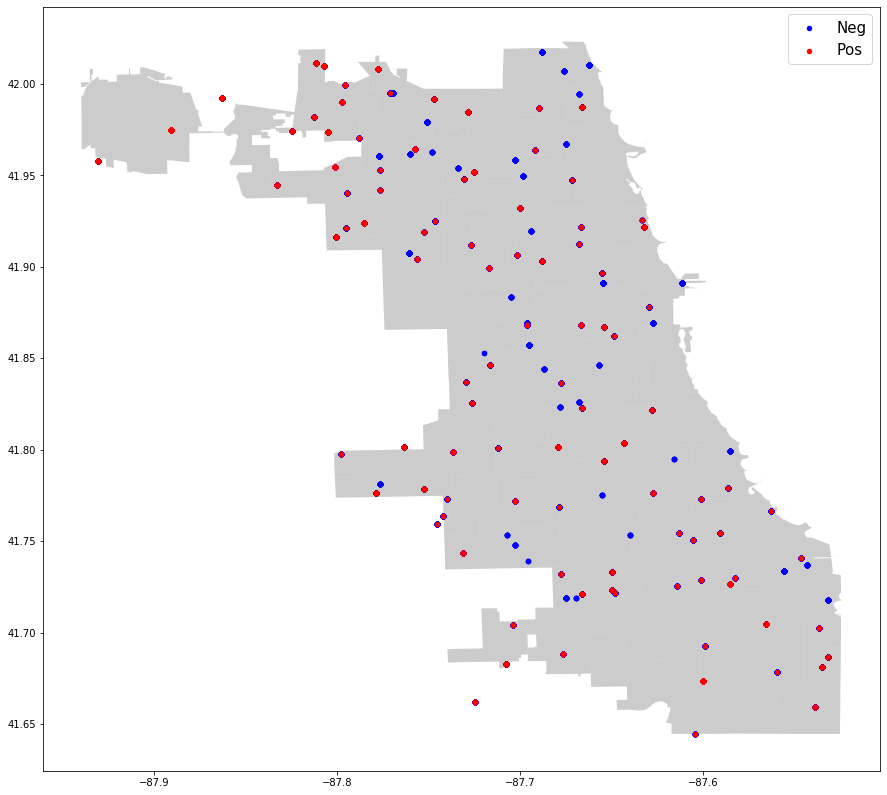

In [75]:
#no direct grouping or pattern at this moment
fig, ax = plt.subplots(figsize=(15,15))
map_plot.plot(ax=ax, alpha=0.4, color='grey')
geo_df[geo_df['WnvPresent']==0].plot(ax=ax, markersize=20, color='blue', marker='o', label='Neg')
geo_df[geo_df['WnvPresent']==1].plot(ax=ax, markersize=20, color='red', marker='o', label='Pos')
plt.legend(prop={'size': 15})

## Lastly, to check the format of the submission

In [76]:
sample = pd.read_csv('../assets/samplesubmission.csv')

In [77]:
sample.head()

,Id,WnvPresent
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
